<a href="https://colab.research.google.com/github/Rongshaofeng/DeepLeaning-Project/blob/master/Keras_BinaryClassify_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#使用IMDB数据集实现二分类任务
from keras.datasets import imdb
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [0]:
#使用数据集中前10000个最常出现的词
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [0]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [0]:
#查看最大的单词索引
max([max(sequence) for sequence in train_data])

9999

In [0]:
#单词映射到整数的词典
word_index=imdb.get_word_index()
#将词典映射调转
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
#将第一个评论解码看看,索引减去了3，因为0，1，2使为padding，start of sequence,unknown分别保留的索引
decoded_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [0]:
#将数据数据向量化
def vectorize_sequences(sequences,dimension=10000):
  results= np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1
  return results

In [0]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [0]:
y_train[0]

1.0

In [0]:
from keras import models
from keras import layers
from keras import optimizers

In [0]:
#模型搭建
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [0]:
#编译模型，指定优化器，损失函数，评估指标
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
#在训练集中划分出验证集
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [0]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 3s 194us/step - loss: 0.5254 - acc: 0.7929 - val_loss: 0.4011 - val_acc: 0.8704
Epoch 2/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.3247 - acc: 0.8996 - val_loss: 0.3227 - val_acc: 0.8793
Epoch 3/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.2380 - acc: 0.9251 - val_loss: 0.2866 - val_acc: 0.8901
Epoch 4/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.1880 - acc: 0.9385 - val_loss: 0.2828 - val_acc: 0.8879
Epoch 5/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.1551 - acc: 0.9496 - val_loss: 0.2801 - val_acc: 0.8892
Epoch 6/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.1255 - acc: 0.9622 - val_loss: 0.3298 - val_acc: 0.8716
Epoch 7/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.1075 - acc: 0.9683 - val_loss: 0

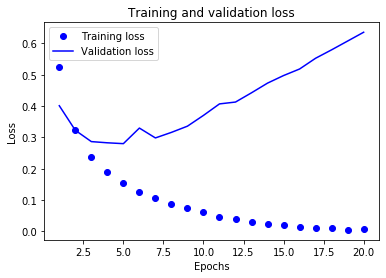

In [0]:
#history对象中有history成员，是一个字典，可以用.keys()查看有什么键值，记录了训练过程的指标数值变化
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

#b代表blue，o代表圆点
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#显示图例说明
plt.legend()

plt.show()

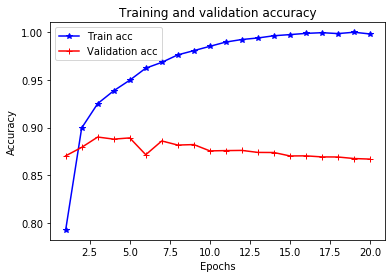

In [0]:
#清空图像
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'b*-',label='Train acc')
plt.plot(epochs,val_acc,'r+-',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
#由图可知过拟合了

In [0]:
#使用测试集评估模型，evaluate返回的是loss和accuracy
results=model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 75us/step


In [0]:
print(results)

[0.6969724848914146, 0.85252]


In [0]:
#看看预测的数值都是多少，模型有多相信自己
model.predict(x_train)

array([[9.9999547e-01],
       [2.8103590e-05],
       [8.0466270e-06],
       ...,
       [1.8417835e-05],
       [9.9999875e-01],
       [1.9462109e-03]], dtype=float32)